#### Select the best features with the most predictive power

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from yellowbrick.model_selection import FeatureImportances
import warnings
warnings.filterwarnings('ignore')

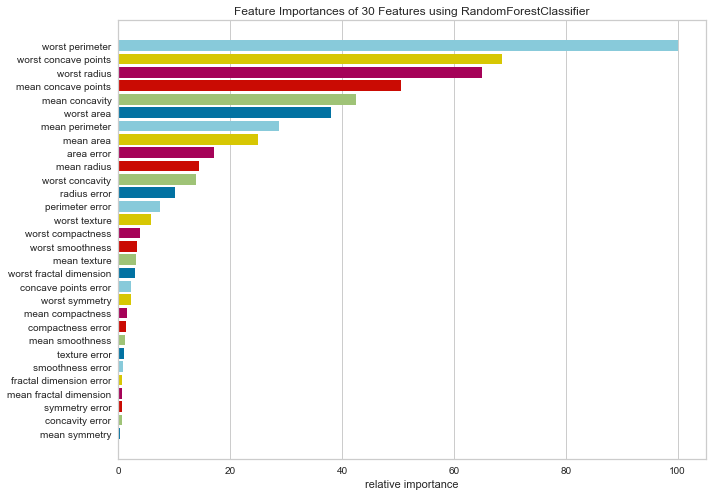

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

X = df
y = cancer.target

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 7])

rf_model = RandomForestClassifier(n_estimators=100, max_depth=3,
                                 bootstrap=True, n_jobs=-1,
                                 random_state=0)

from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(rf_model, relative=True)
viz.fit(X, y)
viz.show(outpath="1.png")

The dataset contains 30 features. But not all features are much contributed to the model. We can remove the features with small bars from the dataset and refit the model with selected features.

#### 2. With the logistic regression estimator that supports the coef_ attribute


For linear models such as linear regression and logistic regression that do not support the feature_importances_ attribute, the FeatureImportances visualizer will use the coef_ attribute to rank and plot importance scores. In this case, it is better to use the raw numeric scores instead of relative importance by setting relative=False.

In the following example, we fit a logistic regression model on the breat_cancer dataset provided by Scikit-learn. Then, we use the Yellowbrick FeatureImportances visualizer to create the bar plot.

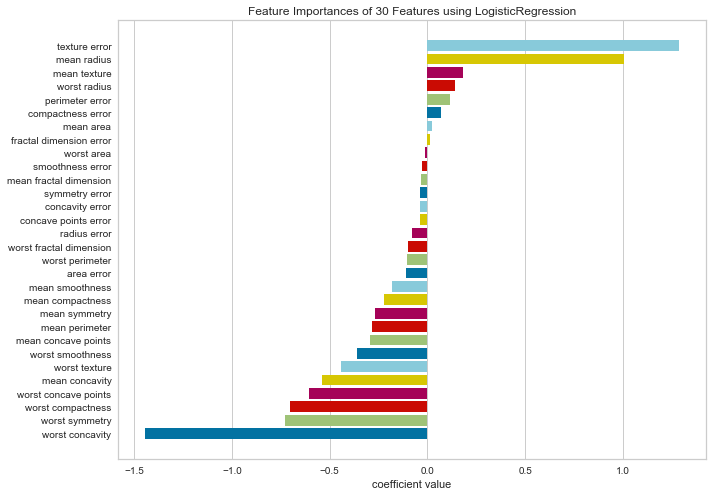

In [3]:
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=[10, 7])

lr_model = LogisticRegression(max_iter=3000)

viz = FeatureImportances(lr_model, relative=False)
viz.fit(X, y)
viz.show(outpath="2.png")

Here, you can see the negative values. This is because the coef_ attribute provides negative values for negative coefficients in the logistic regression model.

To avoid this and get the magnitude of coefficients by avoiding negative signs, we can use absolute=True.

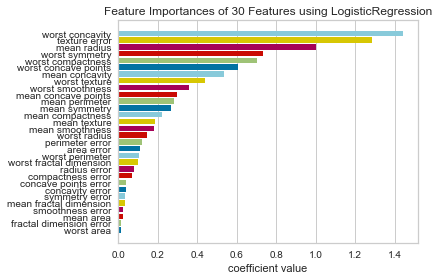

In [5]:
viz = FeatureImportances(lr_model, relative=False, absolute=True)
viz.fit(X, y)
viz.show(outpath="3.png")

Now, the feature importances can be easily compared.